# keras interface

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
print("version:", tf.__version__)
print("gpu available:", tf.config.list_physical_devices("GPU"))
print("gpu name:", tf.test.gpu_device_name())


# load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# build model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # flatten the input layer to 1D array
        tf.keras.layers.Dense(128, activation="relu"),  # 128 neurons in hidden layer
        tf.keras.layers.Dropout(0.2),  # 20% dropout - means 20% of the neurons will be randomly turned off during training
        tf.keras.layers.Dense(10),  # 10 output neurons
    ]
)
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])


# train model
model.fit(x_train, y_train, epochs=5)


# evaluate model
print("model accuracy:")
model.evaluate(x_test, y_test, verbose=2)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
probability_model(x_test[:1]).numpy()

version: 2.15.1
gpu available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
gpu name: /device:GPU:0


2024-05-10 17:16:12.863372: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-10 17:16:12.863400: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4062 - accuracy: 0.8834
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3686 - accuracy: 0.8981
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3832 - accuracy: 0.8961
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3956 - accuracy: 0.8952
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4132 - accuracy: 0.8911
model accuracy:
313/313 - 1s - loss: 0.3509 - accuracy: 0.9071 - 870ms/epoch - 3ms/step


array([[4.0039262e-03, 1.6161168e-06, 2.6007311e-02, 4.7063208e-03,
        1.1395707e-04, 4.1758924e-04, 2.1907285e-06, 9.6445179e-01,
        5.0703886e-05, 2.4449715e-04]], dtype=float32)

total num of test images: 10000
actual: 7, predicted: 7
actual: 2, predicted: 2
actual: 1, predicted: 1
actual: 0, predicted: 4
actual: 4, predicted: 4
actual: 1, predicted: 1
actual: 4, predicted: 4
actual: 9, predicted: 9
actual: 5, predicted: 4
actual: 9, predicted: 9
actual: 0, predicted: 0
actual: 6, predicted: 6
actual: 9, predicted: 9
actual: 0, predicted: 0
actual: 1, predicted: 1
actual: 5, predicted: 5
actual: 9, predicted: 9
actual: 7, predicted: 7
actual: 3, predicted: 7
actual: 4, predicted: 4
actual: 9, predicted: 9
actual: 6, predicted: 5
actual: 6, predicted: 6
actual: 5, predicted: 5
actual: 4, predicted: 4
actual: 0, predicted: 4
actual: 7, predicted: 7
actual: 4, predicted: 4
actual: 0, predicted: 0
actual: 1, predicted: 1
actual: 3, predicted: 7
actual: 1, predicted: 1
actual: 3, predicted: 3
actual: 4, predicted: 4
actual: 7, predicted: 7
actual: 2, predicted: 2
actual: 7, predicted: 2
actual: 1, predicted: 1
actual: 2, predicted: 5
actual: 1, predicted: 1
actual: 

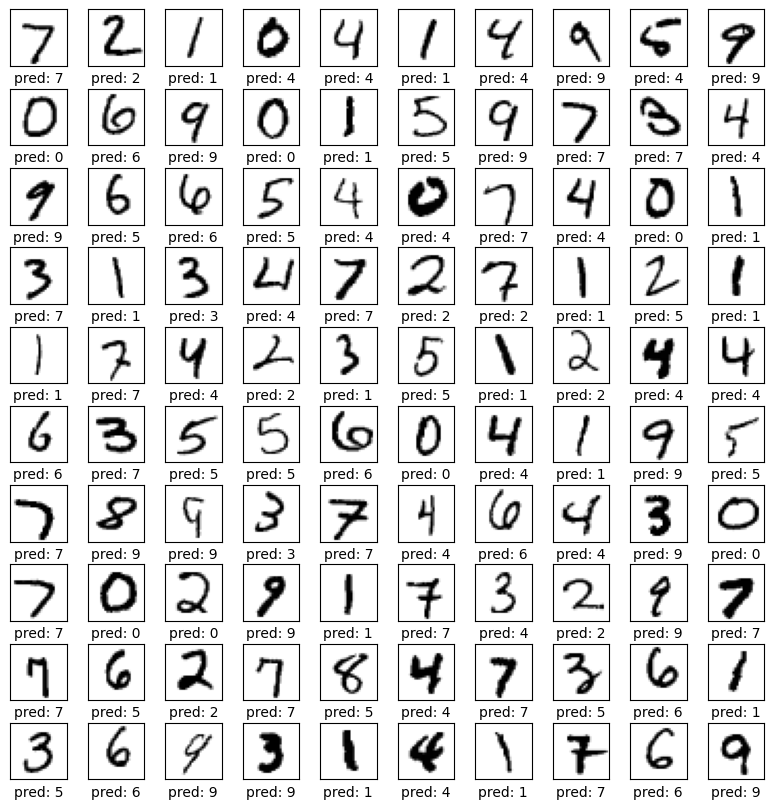

In [36]:
print("total num of test images:", x_test.shape[0])
x_plot = 10
y_plot = 10

plt.figure(figsize=(10, 10))
for i in range(x_plot * y_plot):
    plt.subplot(x_plot, y_plot, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    actual = y_test[i]
    predicted = probability_model(x_test[i:i+1]).numpy().argmax()
    print(f"actual: {actual}, predicted: {predicted}")
    plt.xlabel(f"pred: {predicted}")
    plt.subplots_adjust(wspace=0, hspace=0.4)
plt.show()

# tf interface

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
print("version:", tf.__version__)


# load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")


# batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


# build model
class NNModel(Model):
    def __init__(self): # init a bunch of class variables
        super(NNModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu') 
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10)

    def call(self, x):
        x = self.conv1(x) # convolutional layer: 32 filters, 3x3 kernel, relu activation
        x = self.flatten(x) # flatten the input layer to 1D array
        x = self.d1(x) # hidden layer: 128 neurons, relu activation
        return self.d2(x) # output layer: 10 neurons
model = NNModel()


# loss function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()


# metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape: # tape everything for autodiff
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)


@tf.function
def test_step(images, labels):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)


# train model
EPOCHS = 5
for epoch in range(EPOCHS):
    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result():0.2f}, '
        f'Accuracy: {train_accuracy.result() * 100:0.2f}, '
        f'Test Loss: {test_loss.result():0.2f}, '
        f'Test Accuracy: {test_accuracy.result() * 100:0.2f}'
    )


version: 2.15.1


Epoch 1, Loss: 0.16, Accuracy: 95.24, Test Loss: 0.10, Test Accuracy: 96.85
Epoch 2, Loss: 0.11, Accuracy: 97.26, Test Loss: 0.12, Test Accuracy: 97.49
Epoch 3, Loss: 0.18, Accuracy: 96.96, Test Loss: 0.26, Test Accuracy: 96.92
Epoch 4, Loss: 0.31, Accuracy: 96.89, Test Loss: 0.56, Test Accuracy: 95.73
Epoch 5, Loss: 0.57, Accuracy: 96.54, Test Loss: 0.86, Test Accuracy: 96.16
